In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -q japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI・データサイエンス実践プログラム/データ分析/hotel_reviews.csv', encoding = 'utf-8')

In [ ]:
# データの形状
df.shape

(10000, 14)

In [ ]:
# データの欠損の有無とタイプ
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   性別             10000 non-null  object
 1   年齢             10000 non-null  int64 
 2   個人/グループ        10000 non-null  object
 3   旅行の目的          10000 non-null  object
 4   Wifi設備         10000 non-null  int64 
 5   送迎の便利さ         10000 non-null  int64 
 6   オンライン予約のしやすさ   10000 non-null  int64 
 7   ホテルの立地         10000 non-null  int64 
 8   食事の満足度         10000 non-null  int64 
 9   滞在時の快適さ        10000 non-null  int64 
 10  チェックイン・アウトの接客  10000 non-null  int64 
 11  その他のサービス       10000 non-null  int64 
 12  清潔さ            10000 non-null  int64 
 13  満足度            10000 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 1.1+ MB


In [ ]:
# データの各代表値（最頻値はない）
df.describe(include = 'all')

,性別,年齢,個人/グループ,旅行の目的,Wifi設備,送迎の便利さ,オンライン予約のしやすさ,ホテルの立地,食事の満足度,滞在時の快適さ,チェックイン・アウトの接客,その他のサービス,清潔さ,満足度
count,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
unique,2,NaN,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,女性,NaN,グループ,旅行,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,5031,NaN,6798,3041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,39.486800,NaN,NaN,2.814000,3.104400,2.841000,2.989100,3.20040,3.438700,3.293900,3.646200,3.281900,3.201900
std,NaN,15.175528,NaN,NaN,1.248984,1.482404,1.331201,1.274654,1.32658,1.316441,1.261936,1.168829,1.310116,0.967176
min,NaN,7.000000,NaN,NaN,1.000000,0.000000,0.000000,1.000000,0.00000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,NaN,27.000000,NaN,NaN,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,3.000000,2.000000,3.000000
50%,NaN,40.000000,NaN,NaN,3.000000,3.000000,3.000000,3.000000,3.00000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,NaN,51.000000,NaN,NaN,4.000000,4.000000,4.000000,4.000000,4.00000,5.000000,4.000000,5.000000,4.000000,4.000000


In [ ]:
# 最頻値
df.mode()

,性別,年齢,個人/グループ,旅行の目的,Wifi設備,送迎の便利さ,オンライン予約のしやすさ,ホテルの立地,食事の満足度,滞在時の快適さ,チェックイン・アウトの接客,その他のサービス,清潔さ,満足度
0,女性,39,グループ,旅行,3,4,3,3,4,4,4,4,4,3


In [ ]:
# 初めの5つのデータ
df.head()

,性別,年齢,個人/グループ,旅行の目的,Wifi設備,送迎の便利さ,オンライン予約のしやすさ,ホテルの立地,食事の満足度,滞在時の快適さ,チェックイン・アウトの接客,その他のサービス,清潔さ,満足度
0,女性,50,グループ,学生,4,4,4,4,3,4,4,4,4,4
1,女性,35,個人,ビジネス,4,5,4,4,1,1,5,4,1,2
2,女性,22,グループ,その他,1,1,1,4,1,5,1,3,1,3
3,男性,30,個人,航空関係,3,4,3,4,5,1,4,4,5,3
4,男性,59,グループ,航空関係,4,3,3,3,4,4,3,5,4,4


In [ ]:
# 最後の5つのデータ
df.tail()

,性別,年齢,個人/グループ,旅行の目的,Wifi設備,送迎の便利さ,オンライン予約のしやすさ,ホテルの立地,食事の満足度,滞在時の快適さ,チェックイン・アウトの接客,その他のサービス,清潔さ,満足度
9995,女性,41,グループ,学生,3,2,2,2,3,3,3,2,3,3
9996,男性,60,個人,学生,2,4,2,1,4,4,2,1,4,3
9997,男性,33,グループ,学生,5,5,5,5,4,4,3,5,4,5
9998,女性,22,グループ,旅行,5,5,5,5,5,5,1,3,5,5
9999,男性,34,個人,学生,3,2,3,2,5,5,1,3,5,4


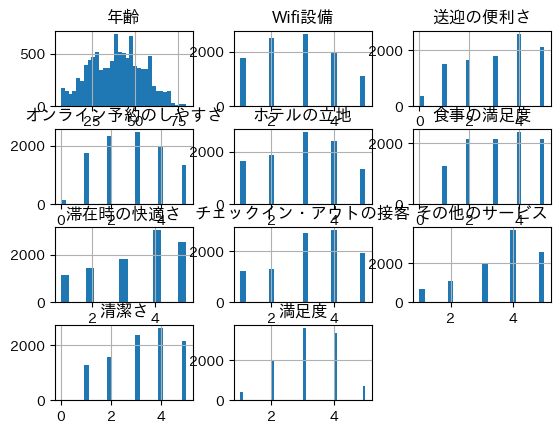

In [ ]:
# すべてのカラムのヒストグラム
df.hist(bins = 'auto')
# このノートブック全体において表示する画像のサイズを設定しておく
plt.rcParams['figure.figsize'] = 10, 6
# 画像の表示（なくても良い（あると余計なコメントが消える））
plt.show()

In [ ]:
# 満足度の取りうる値とそのデータ数
df['満足度'].value_counts()

3    3566
4    3349
2    1976
5     716
1     393
Name: 満足度, dtype: int64

In [ ]:
# 合計が1になるように正規化
df['満足度'].value_counts(normalize = True)

3    0.3566
4    0.3349
2    0.1976
5    0.0716
1    0.0393
Name: 満足度, dtype: float64

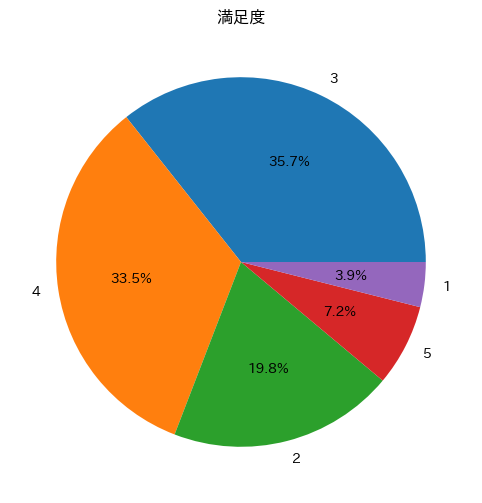

In [ ]:
# 円グラフ
plt.title('満足度')
x = df['満足度'].value_counts()
plt.pie(x, labels = x.index, autopct = '%.1f%%')
plt.show()

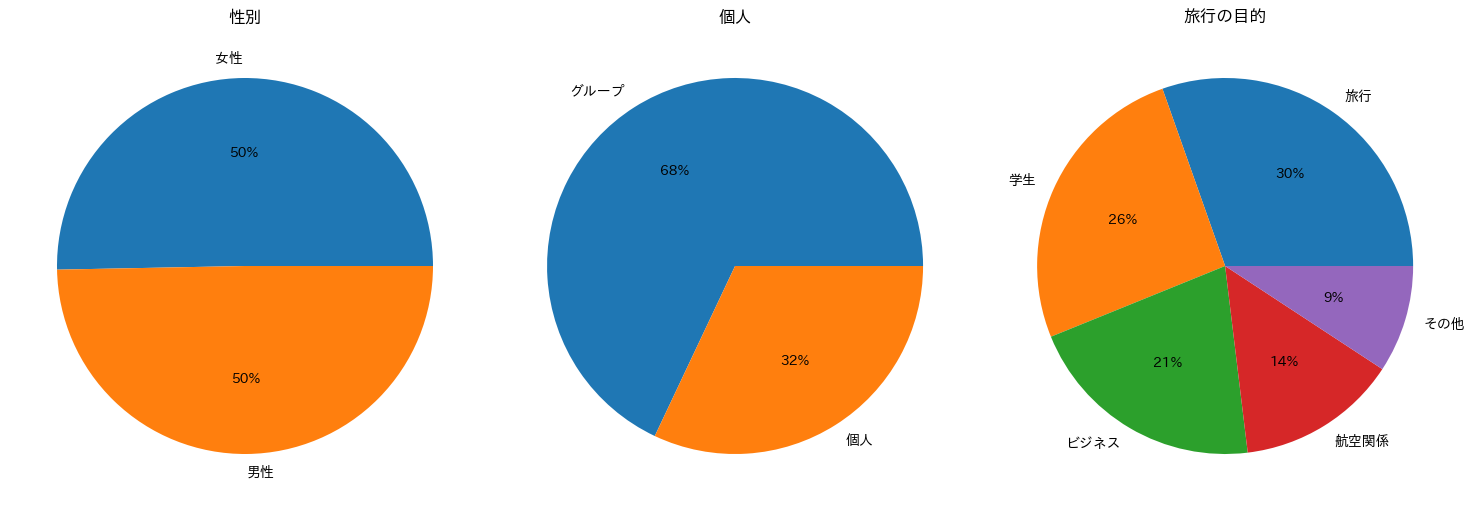

In [ ]:
# 演習問題

fig, axs = plt.subplots(1, 3, figsize = (15, 5))

# 性別
x = df['性別'].value_counts()
axs[0].pie(x, labels = x.index, autopct = '%1.f%%')
axs[0].set_title('性別')

# 個人
x = df['個人/グループ'].value_counts()
axs[1].pie(x, labels = x.index, autopct = '%1.f%%')
axs[1].set_title('個人')

# 旅行
x = df['旅行の目的'].value_counts()
axs[2].pie(x, labels = x.index, autopct = '%1.f%%')
axs[2].set_title('旅行の目的')

plt.tight_layout()
plt.show()

In [ ]:
#　ある質的変数ごとの別の質的変数の個数
pd.crosstab(df['満足度'], df['性別'])

性別,女性,男性
満足度,,
1,157,236
2,959,1017
3,1880,1686
4,1692,1657
5,343,373


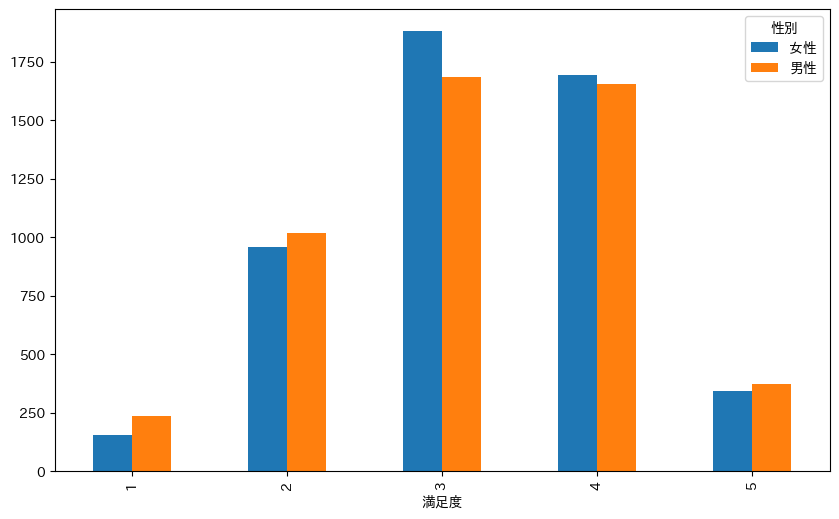

In [ ]:
# ヒストグラム
ct = pd.crosstab(df['満足度'], df['性別'])
ct.plot.bar()
plt.show()

<Axes: xlabel='満足度', ylabel='count'>

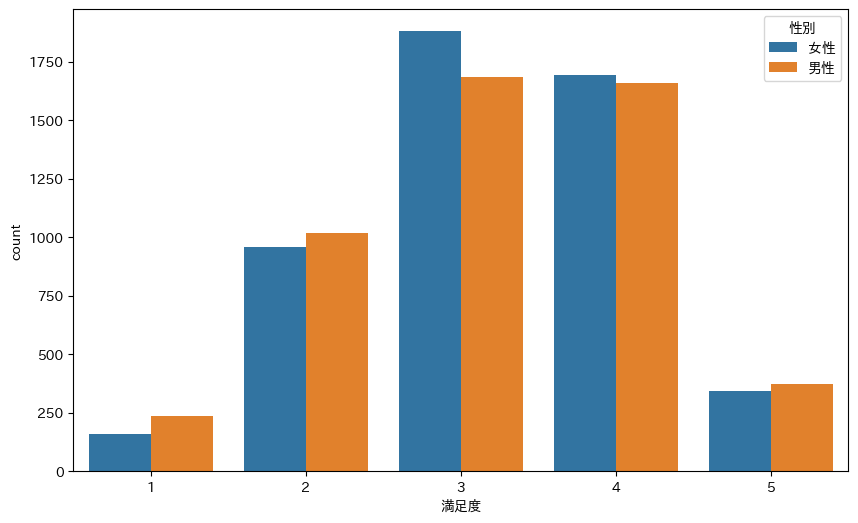

In [ ]:
# seabornでも可視化
import seaborn as sns
sns.countplot(x='満足度', hue='性別', data=df)

個人/グループ,グループ,個人
満足度,,
1,224,169
2,1107,869
3,2308,1258
4,2509,840
5,650,66


<Axes: xlabel='満足度', ylabel='count'>

個人/グループ
グループ    3.331568
個人      2.926608
Name: 満足度, dtype: float64

個人/グループ
グループ    3.0
個人      3.0
Name: 満足度, dtype: float64

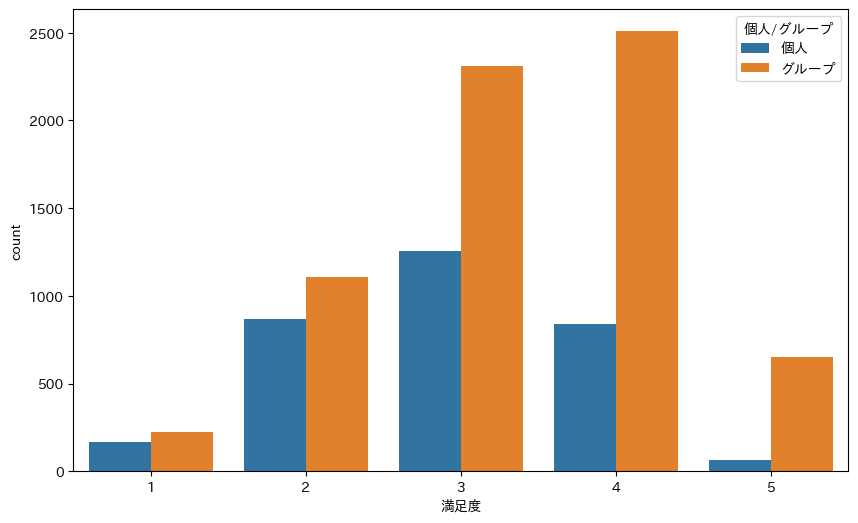

In [ ]:
# 演習問題　満足度　個人/グループ
display(pd.crosstab(df['満足度'], df['個人/グループ']))
display(sns.countplot(x='満足度', hue='個人/グループ', data=df))
g = df.groupby('個人/グループ')
display(g['満足度'].mean())
display(g['満足度'].median())

旅行の目的,その他,ビジネス,学生,旅行,航空関係
満足度,,,,,
1,33,73,110,124,53
2,176,408,483,634,275
3,343,740,946,1047,490
4,301,703,848,1025,472
5,71,154,186,211,94


旅行の目的
その他     3.217532
ビジネス    3.219923
学生      3.200933
旅行      3.185794
航空関係    3.201590
Name: 満足度, dtype: float64

旅行の目的
その他     3.0
ビジネス    3.0
学生      3.0
旅行      3.0
航空関係    3.0
Name: 満足度, dtype: float64

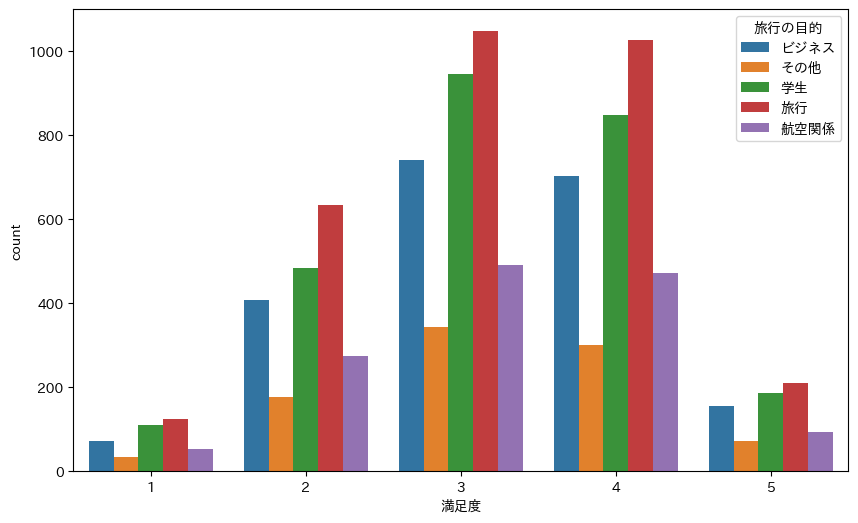

In [ ]:
# 演習問題　満足度　旅行の目的
display(pd.crosstab(df['満足度'], df['旅行の目的']))
sns.countplot(x='満足度', hue='旅行の目的', data=df)
g = df.groupby('旅行の目的')
display(g['満足度'].mean())
display(g['満足度'].median())